# Homework 4 


### Question 1 
#### Analytical Solution

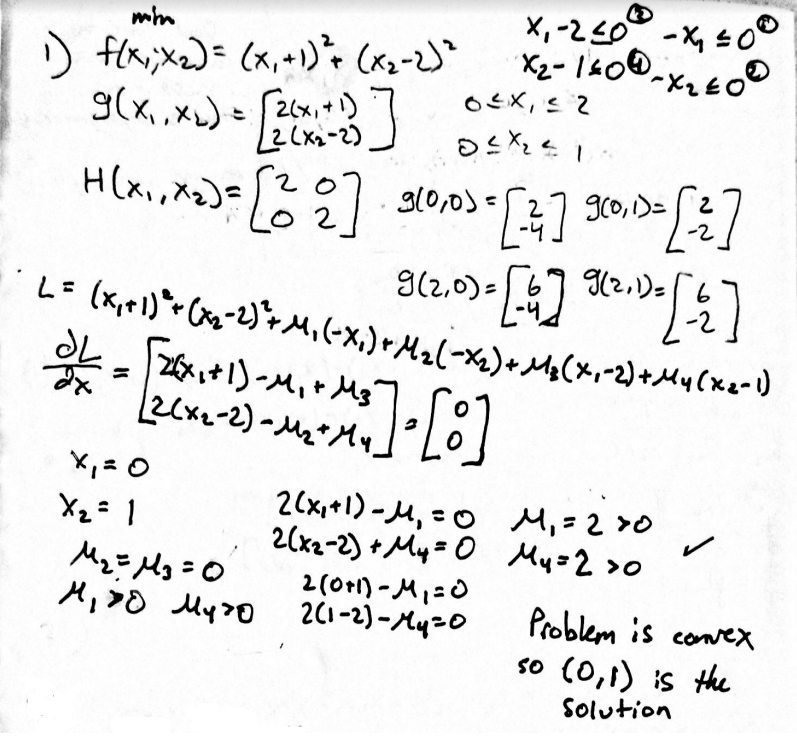


#### Solution: [x1,x2] = [0,1]


Code that creates and shows the boundaries of the plot

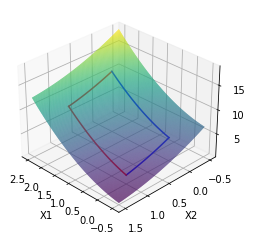

In [28]:
# Problem 1
# Minimize x1, x2
# f(x1, x2) = (x1+1)^2 + (x2-2)^2

# Subject to:
# g1 -> x1 - 2 <= 0
# g2 -> x2 - 1 <= 0
# g3 -> -x1 <= 0
# g4 -> -x2 <= 0

import torch as t
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

x1_down = 0
x1_up = 2
x2_down = 0
x2_up = 1
obj_space = .5

x1 = np.linspace(x1_down,x1_up,100)
x2 = np.linspace(x2_down,x2_up,100)
obj_x1 = np.linspace(x1_down-obj_space,x1_up+obj_space,200)
obj_x2 = np.linspace(x2_down-obj_space,x2_up+obj_space,200)

fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.xlabel("X1")
plt.ylabel("X2")

def f(x1, x2):
    return (x1+1)**2 + (x2-2)**2


obj_X1, obj_X2 = np.meshgrid(obj_x1, obj_x2)
obj_Z = f(obj_X1, obj_X2)

ax.plot_surface(obj_X1, obj_X2, obj_Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.view_init(30,135)


#X1, X2 = np.meshgrid(x1, x2)
obj1_up = f(x1_up, x2)
obj1_down = f(x1_down, x2)
obj2_up = f(x1, x2_up)
obj2_down = f(x1, x2_down)

ax.plot(np.linspace(x1_up, x1_up, 100), x2, obj1_up, color = 'red')
ax.plot(np.linspace(x1_down, x1_down, 100), x2, obj1_down, color = 'blue')

ax.plot(x1, np.linspace(x2_up, x2_up, 100), obj2_up, color = 'red')
ax.plot(x1, np.linspace(x2_down, x2_down, 100), obj2_down, color = 'blue')




### Question 2

#### Analytical Soltution

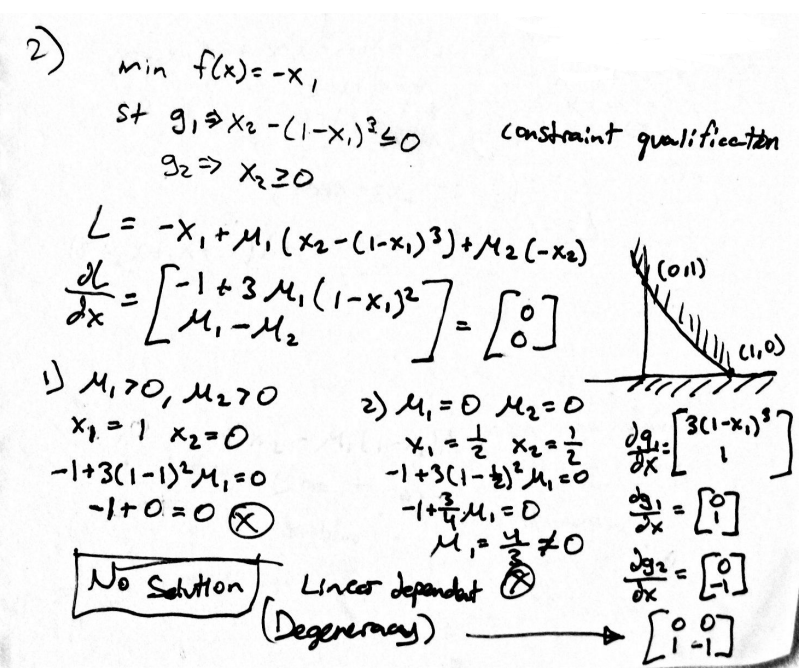

#### Solution: No Solution

Code that shows the two intersecting functions

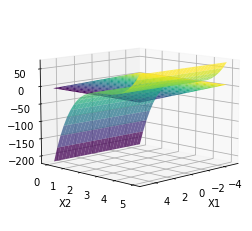

In [1]:
# Problem 2

# Minimize x1, x2
# f(x1) = -x1

# Subject to:
# g1 -> x2 - (1-x1)^3 <= 0 AND x2 >= 0


import torch as t
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

array_size = 25

fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.xlabel("X1")
plt.ylabel("X2")

x1 = np.linspace(-5,5,array_size)
x2 = np.linspace(0,5, array_size)

def f(x1):
    return -1*x1

def opt_cond(x1, x2):
    return x2 - (1-x1)**3

X1, X2 = np.meshgrid(x1,x2)
z = f(x1)
Z = np.repeat(z[:, np.newaxis], array_size, axis = 1)
Z = np.transpose(Z)
ax.plot_surface(X1, X2, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')

opt_z = opt_cond(x1, x2)
opt_Z = np.repeat(opt_z[:, np.newaxis], array_size, axis = 1)
Z = np.transpose(opt_Z) 
ax.plot_surface(X1, X2, opt_Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none', alpha = .75)

ax.view_init(10,45)


### Question 3 

#### Analytical Solution (Reduced Gradient)

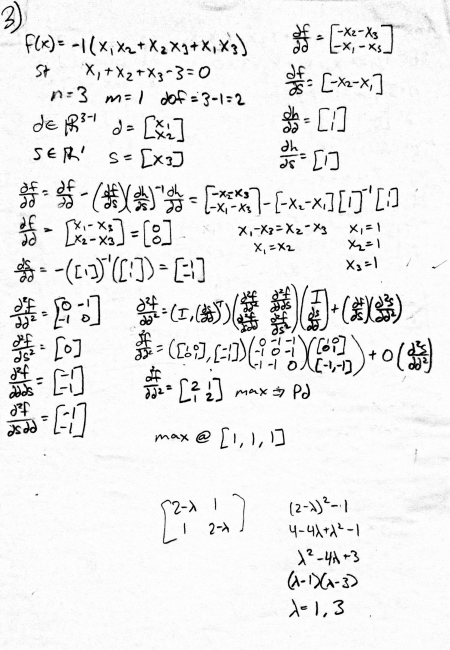


#### Solution: [x1,x2,x3] = [1,1,1]




#### Analytical Soltution (Lagrange Multiplier)

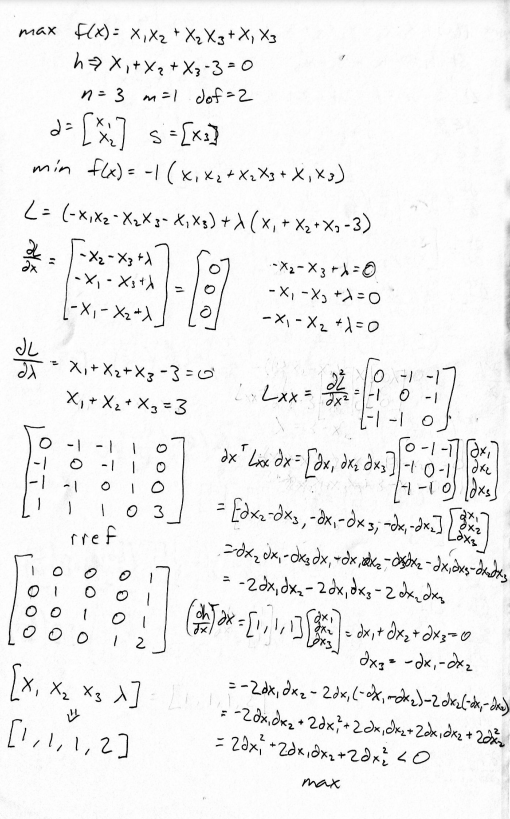

#### Solution: [x1,x2,x3,Lambda] = [1,1,1,2]


### Question 4 

Analytical Solution

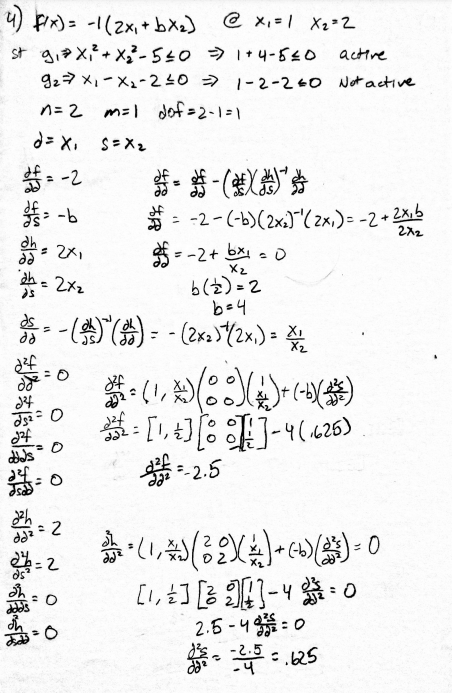

#### Solution: b = 4




### Question 5

Analysis of the Problem:
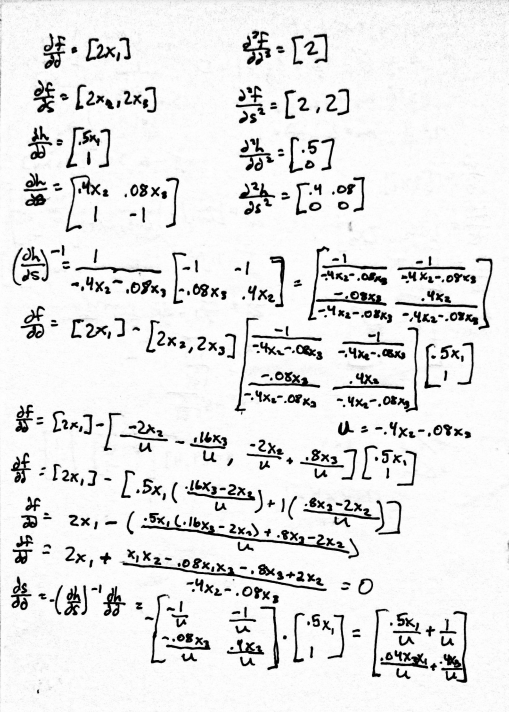



The code for the generalized reduced gradient algorithm is below:

In [82]:
# Min f(x) = x1^2+x2^2+x3^2
# h1 => x1^2/4+x2^2/5+x3^2/25-1=0
# h2 => x1 + x2 - x3 = 0

import torch as t
import math

# Initialize Variables
x1 = 2.0 #2*math.sqrt(15/17)
x2 = 2.0 #-1*math.sqrt(5/51)
x3 = 2.0 #-5*math.sqrt(5/51)

n = 3
m = 2
dof = n - m

d = t.tensor([x1])
s = t.tensor([x2, x3])
x0 = t.cat([d, s])

k = 0
error = 10** (-3)

# Objective and Equality Functions 
def func(x):
    return x[0]**2+x[1]**2+x[2]**2

def h(x):
    return [[x[0]**2/4+x[1]**2/5+x[2]**2/25-1],[x[0] + x[1] - x[2]]]

# Decision and State Variables
def dfdd(d):
    return 2*d[0]
    
def dhdd(d):
    return t.tensor([[d[0]/2],[1]])
    
def dfds(s):
    return t.tensor([2*s[0], 2*s[1]])
    
def dhds(s):
    return t.tensor([[2/5*s[0], 2/25*s[1]], [1, -1]])

# Determines df/dd
def dfdd_x(df_dd, df_ds, dh_ds, dh_dd):
    val = t.inverse(dh_ds)
    ans = t.matmul(df_ds, val)
    ans = t.matmul(ans, dh_dd)
    return df_dd - ans
  
def linesearch(d_df, s_k, d_k):
    # Initialize
    a = 1
    b = .5
    t0 = .3
    d_df_T = t.transpose(d_df,0,0)
    s_dh = t.inverse(dh_ds)
    
    def f_a(a):
        dk = d_k-a*d_df
        f1 = t.matmul(s_dh, dh_dd)
        f2 = t.matmul(f1, d_df_T)
        sk = s_k+a*t.transpose(f2,0,0)
        
        xk = t.cat([dk,sk])
        return func(xk)
    
    def p_a(a):
        f1 = d_k[0]**2+s_k[0]**2+s_k[1]**2
        f2 = a*t0*t.matmul(d_df, d_df_T)
        return f1-f2
    
    while(f_a(a) > p_a(a)):
        print("function = ", f_a(a))
        print("phi = ", p_a(a))
        a = a * b
        
    return a

# Solving For H = 0
def solve_h(h, d_k1, s0_k1):
    while(math.sqrt(h[0]**2+h[1]**2) > error): 
        dh_ds = dhds(s0_k1)
        sk1j1 = s0_k1-t.matmul(t.inverse(dh_ds),h)
        print(d_k1)
        x_k1j1 = t.cat([d_k1,sk1j1[:,0]])
        print(x_k1j1)
        h = t.tensor(h(x_k1j1))
        
# Get the First Degree of Decisiona and State Variables
df_dd = dfdd(d)
dh_dd = dhdd(d)
df_ds = dfds(s)
dh_ds = dhds(s)

# Calculate Reduced Gradient
df_dd = dfdd_x(df_dd, df_ds, dh_ds, dh_dd)

# Loop till it reaches tolerance
while(df_dd**2 > error):
    a_k = linesearch(df_dd, s, d)
    d_k1 = d - a_k * df_dd
    s0_k1 = s + a_k * t.transpose(t.matmul(t.matmul(t.inverse(dh_ds),dh_dd),t.transpose(df_dd,0,0)),0,0)
    x_k1 = t.cat([d_k1,s0_k1])
    h = t.tensor(h(x_k1))
    s_k1 = solve_h(h, d_k1, s0_k1)
    df_dd = dfdd(d_k1)
    dh_dd = dhdd(d_k1)
    df_ds = dfds(s_k1)
    dh_ds = dhds(s_k1)
    d_df = dfdd_x(df_dd, df_ds, dh_ds, dh_dd)
    k = k + 1
    
# Print Solution
print("X1 = ", d_k1[0])
print("X2 = ", s_k1[0])
print("X3 = ", s_k1[1])
x_final = t.cat([d, s])
f_final = func(x_final)
print("Where f(x) is a minimum at = ", f_final)











function =  tensor(16.1763)
phi =  tensor(11.1667)
function =  tensor(12.3496)
phi =  tensor(11.5833)
tensor([2.4167])
tensor([ 2.4167, -0.3135,  1.6865])


TypeError: 'Tensor' object is not callable